### Image Classification:
    Based on the kaggle competition https://www.kaggle.com/c/yelp-restaurant-photo-classification
   

In [8]:
# setting up the file structure for keras to pull data from

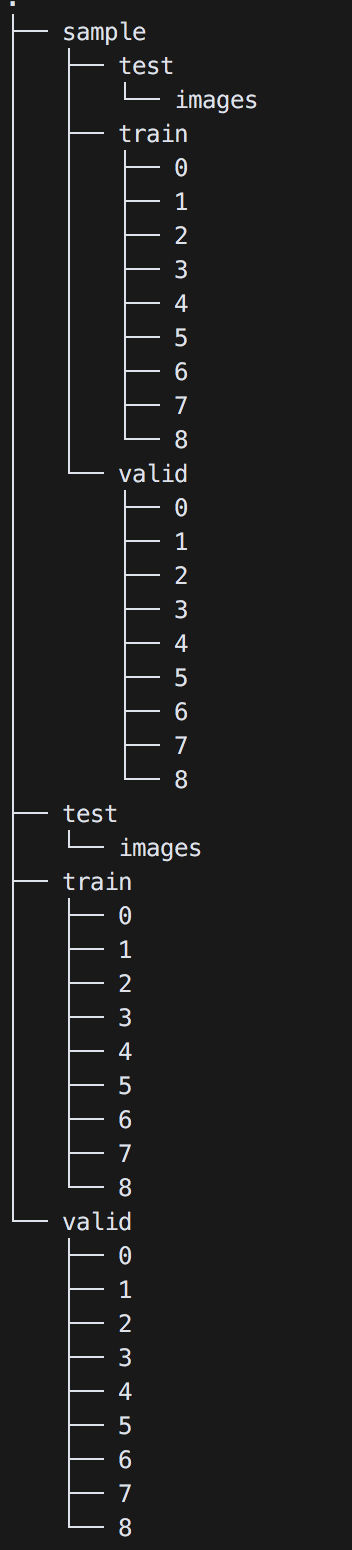

In [18]:
from IPython.display import Image
Image(filename='dir.png')

Data description found at https://www.kaggle.com/c/yelp-restaurant-photo-classification/data

    1.train_photos.tgz - photos of the training set
    2.test_photos.tgz - photos of the test set
    3.train_photo_to_biz_ids.csv - maps the photo id to business id
    4.test_photo_to_biz_ids.csv - maps the photo id to business id
    5.train.csv - main training dataset. Includes the business id's, and their corresponding labels. 
    6.sample_submission.csv - sample submission and the test dataset. 
    
    This is the correct format for your predictions. It should include the business_id and the corresponding predicted labels.
    
### Labels:
    0: good_for_lunch
    1: good_for_dinner
    2: takes_reservations
    3: outdoor_seating
    4: restaurant_is_expensive
    5: has_alcohol
    6: has_table_service
    7: ambience_is_classy
    8: good_for_kids
    
for train we have the following structure
    1. train (b_id, label)
    2. train_photo_to_biz_ids (p_id, b_id)
    3. train_photos (p_id) images
  
ToDo:
    1. move each image into the respective category folder
    2. if an image is part of 2 or more categories move the image into both the folders

In [23]:
%matplotlib inline

In [24]:
import shutil
import os, random
import numpy as np
import pandas as pd
import math
from numpy import nan
from os import listdir
from os.path import isfile, join
import random

In [25]:
path = '/Users/joseph/Documents/joseph/data/yelp_image_classification/data/'

In [26]:
# 1. move each image into the respective category folder
# create a dictionary mapping each photo_id to a list of categories
train_pid_bid = pd.read_csv(path+'train_photo_to_biz_ids.csv')
train_bid_label = pd.read_csv(path+'train.csv')

In [40]:
# remove NaN data
train_bid_label.dropna(inplace = True)

In [41]:
# train -<b_id, label, p_id>
train_pid_label = pd.merge(left = train_bid_label,  right = train_pid_bid, on = 'business_id')

In [43]:
train_pid_label_dict = train_pid_label.to_dict('records')

In [44]:
pid_label_map = {}
for elt in train_pid_label_dict:
    pid_label_map[elt['photo_id']] = str(elt['labels']).split(' ')

In [47]:
# photo_id: [label1, lable2, ... labeln]
pid_label_map[14]

['1', '2', '4', '5', '6', '7', '8']